## K-means

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:


- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [5]:
sns.set()

In [3]:
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

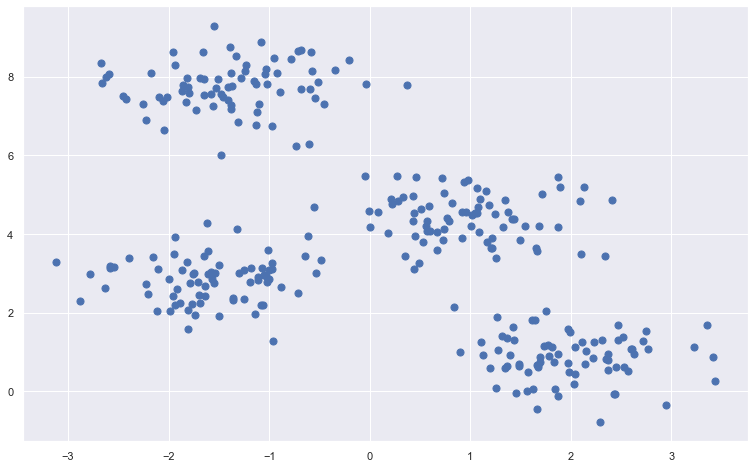

In [6]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], s = 50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically.

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters = 4)

In [9]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [10]:
y_kmeans = kmeans.predict(X)

In [11]:
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314]])

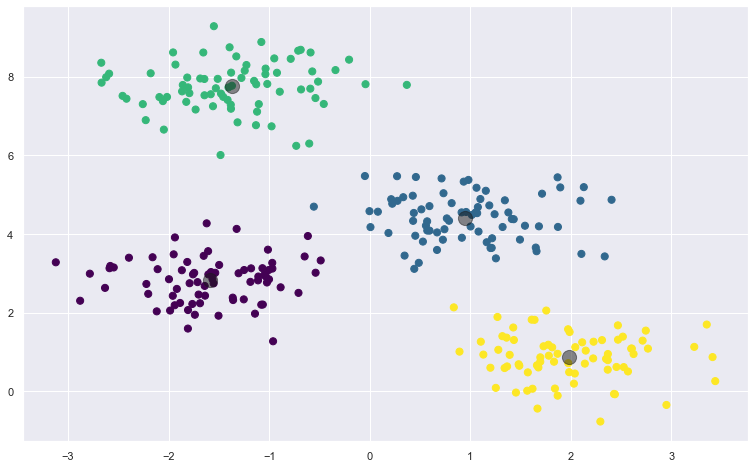

In [12]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'k', s = 200, alpha = 0.5);

### k-Means Algorithm: Expectation–Maximization


Expectation–maximization (E–M) is a powerful algorithm and k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach here consists of the following procedure:

- Guess some cluster centers
- Repeat until converged
    - Asign points to the nearest cluster center
    - Move the cluster centers to the mean

In [13]:
from sklearn.metrics import pairwise_distances_argmin

In [14]:
#set the center randomlly
rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)
centers

array([[ 0.49671415,  3.8617357 ],
       [ 0.64768854,  5.52302986],
       [-0.23415337,  3.76586304],
       [ 1.57921282,  4.76743473]])

In [15]:
pairwise_distances_argmin(X, centers)

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 0, 3, 0, 2, 2, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 1,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 3, 2, 1, 2, 1, 1, 1, 3, 1, 1,
       0, 2, 1, 2, 0, 3, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 1,
       0, 0, 0, 2, 0, 3, 2, 2, 0, 3, 1, 0, 0, 1, 0, 2, 3, 0, 2, 2, 2, 3,
       2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 3, 1, 3, 2, 2, 3, 1, 2, 2, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 1, 3, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 0, 2, 2, 2, 0, 0, 1, 3, 1, 2, 0,
       1, 2, 3, 1, 1, 0, 0, 2, 2, 3, 3, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2], d

In [16]:
def draw_points(ax, c, factor = 1):
    ax.scatter(X[:, 0], X[:, 1], c = c, cmap = 'viridis',
               s = 50 * factor, alpha = 0.3)

In [17]:
def draw_centers(ax, centers, factor = 1, alpha = 1.0):
    
    ax.scatter(centers[:, 0], centers[:, 1],
               c = np.arange(4), cmap = 'viridis', s = 200 * factor,
               alpha=alpha)
    
    ax.scatter(centers[:, 0], centers[:, 1],
               c = 'black', s = 50 * factor, alpha = alpha) 

In [18]:
def make_ax(fig, gs):
    
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

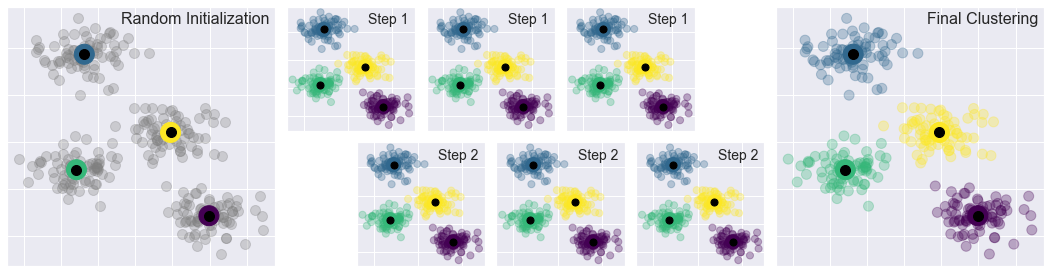

In [24]:
fig = plt.figure(figsize = (15, 4))
gs = plt.GridSpec(4, 15, left = 0.02, right = 0.98, bottom = 0.05,
                  top = 0.95, wspace = 0.2, hspace = 0.2)

ax0 = make_ax(fig, gs[:, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform = ax0.transAxes,
         ha = 'right', va = 'top', size = 16)

draw_points(ax0, 'gray', factor = 2)
draw_centers(ax0, centers, factor = 2)

for i in range(3):
    
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step                               colapse in the rows
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    
    #make an arrow
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops = {'arrowstyle' : '->', 'linewidth' : 1})
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "Step 1", transform = ax1.transAxes, ha = 'right',
             va = 'top', size = 14)
    ax2.text(0.95, 0.95, "Step 2", transform = ax2.transAxes, ha = 'right',
             va = 'top', size = 14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:, -4:])
draw_points(axf, y_pred, factor = 2)
draw_centers(axf, centers, factor = 2)
axf.text(0.98, 0.98, "Final Clustering", transform = axf.transAxes,
         ha = 'right', va = 'top', size = 16);

**Exercise** 
- Implement K means

#### The globally optimal result may not be achieved

First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution. For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results:

In [88]:
kmeans2 = ClusterKMeans(4, rseed = 0)

In [89]:
kmeans2.fit(X)

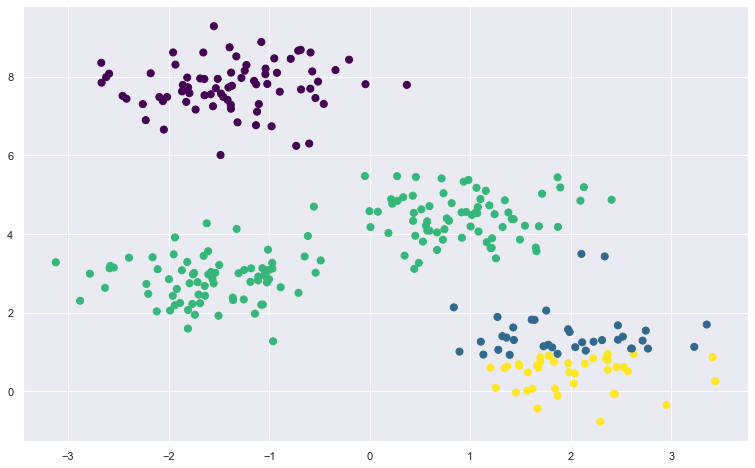

In [90]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], c = kmeans2.labels, s = 50, cmap = 'viridis');

Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the `n_init` parameter, which defaults to 10).

#### The number of clusters must be selected beforehand

Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data. For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters:

In [91]:
labels = KMeans(6, random_state=0).fit_predict(X)

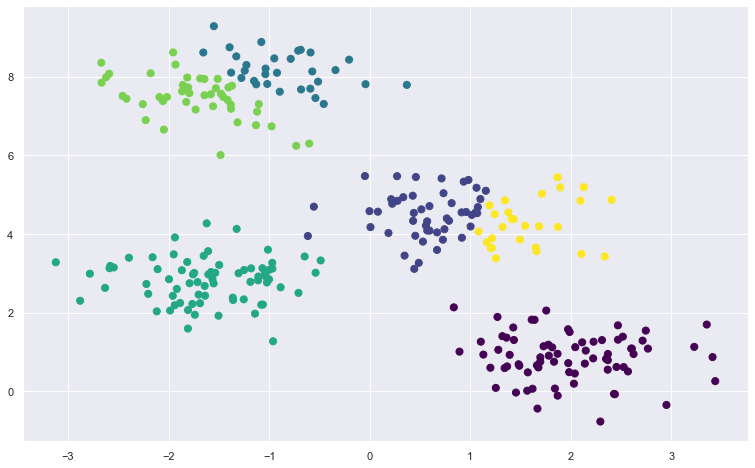

In [92]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

#### Selecting the number of clusters with silhouette


Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


$$S(i) = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}$$

- $a(i)$ the average distance of the point $i$ and all other points in its cluster.
- $b(i)$ the lowest average distance of the point $i$ and all other cluster.


$$-1 \le S(i) \le 1$$


In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551769
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923875148758644
For n_clusters = 6 The average silhouette_score is : 0.4993450440592758


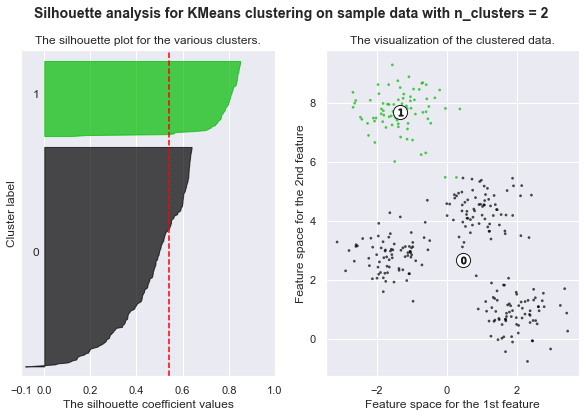

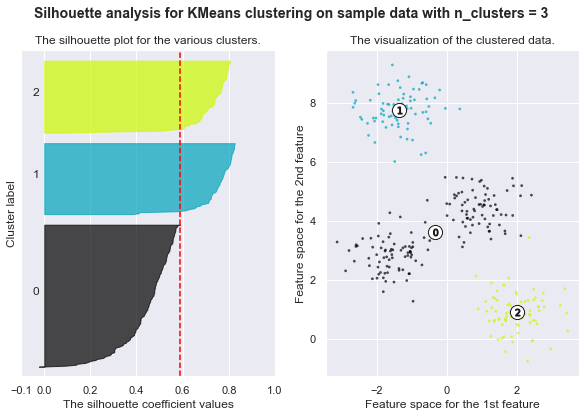

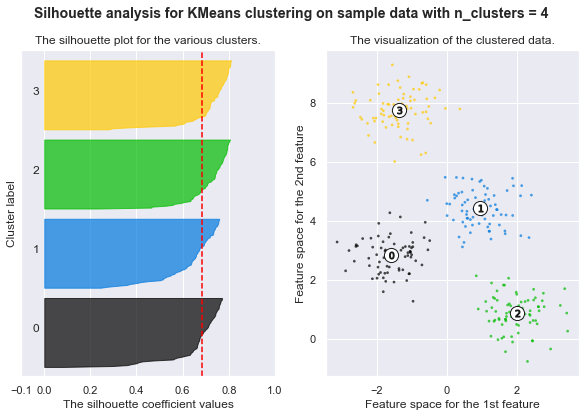

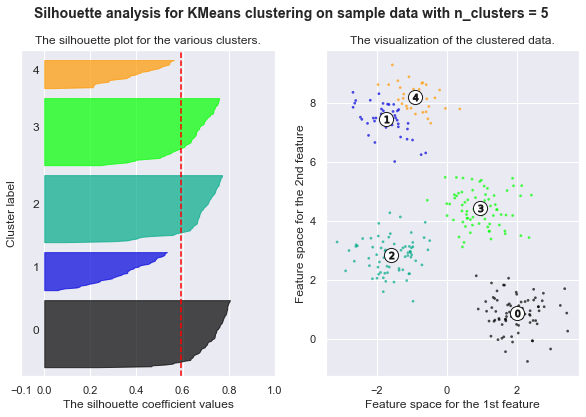

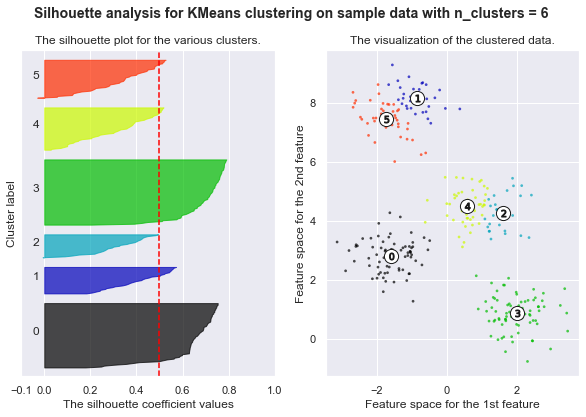

In [96]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
    
    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    clusterer = KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    msn = "For n_clusters = {} The average silhouette_score is : {}"
    print(msn.format(n_clusters, silhouette_avg))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor = color, edgecolor = color, alpha = 0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7,
                c = colors, edgecolor = 'k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o',
                c = "white", alpha = 1, s = 200, edgecolor = 'k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1,
                    s = 50, edgecolor = 'k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = {}".format(n_clusters)),
                 fontsize = 14, fontweight = 'bold');

### Elbow Method

- Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

- Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [97]:
from sklearn import metrics
from scipy.spatial.distance import cdist

In [98]:
distortions = []
inertias = []

 
for k in range(1, 10):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis = 1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 

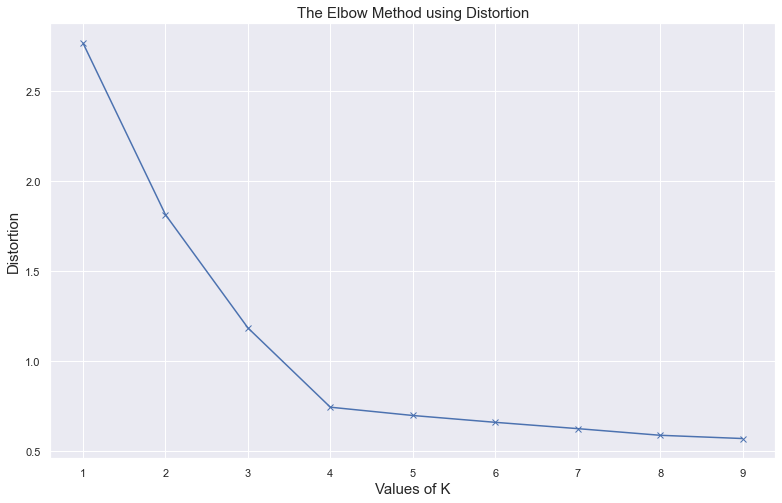

In [99]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(range(1, 10), distortions, 'bx-')
ax.set_xlabel('Values of K', fontsize = 15)
ax.set_ylabel('Distortion', fontsize = 15)
ax.set_title('The Elbow Method using Distortion', fontsize = 15);

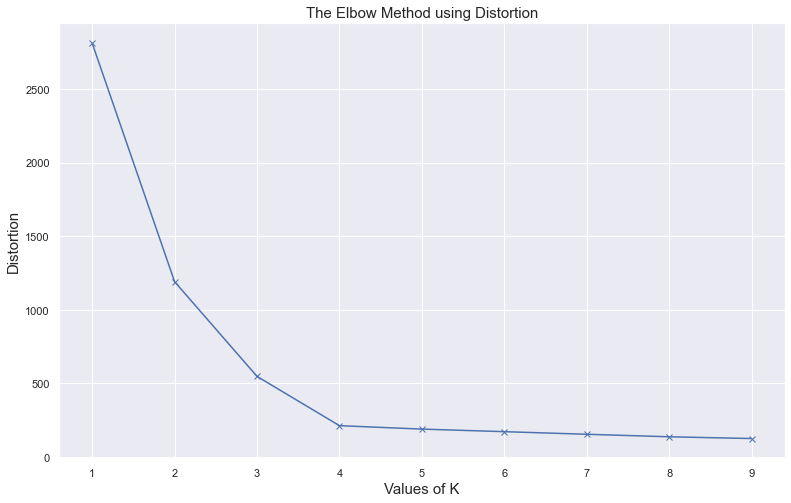

In [100]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(range(1, 10), inertias, 'bx-')
ax.set_xlabel('Values of K', fontsize = 15)
ax.set_ylabel('Distortion', fontsize = 15)
ax.set_title('The Elbow Method using Distortion', fontsize = 15);

### k-means is limited to linear cluster boundaries

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In [101]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = .05, random_state = 0)

In [102]:
labels = KMeans(2, random_state = 0).fit_predict(X)

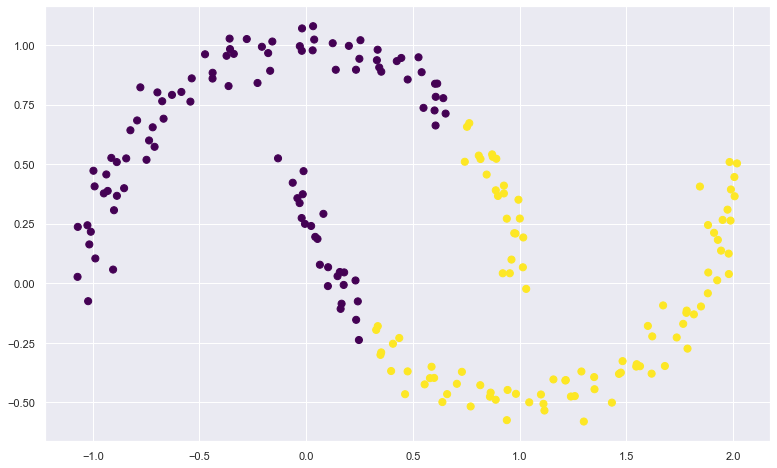

In [103]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

In [104]:
from sklearn.cluster import SpectralClustering

In [105]:
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors',
                           assign_labels = 'kmeans')
labels = model.fit_predict(X)

D:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


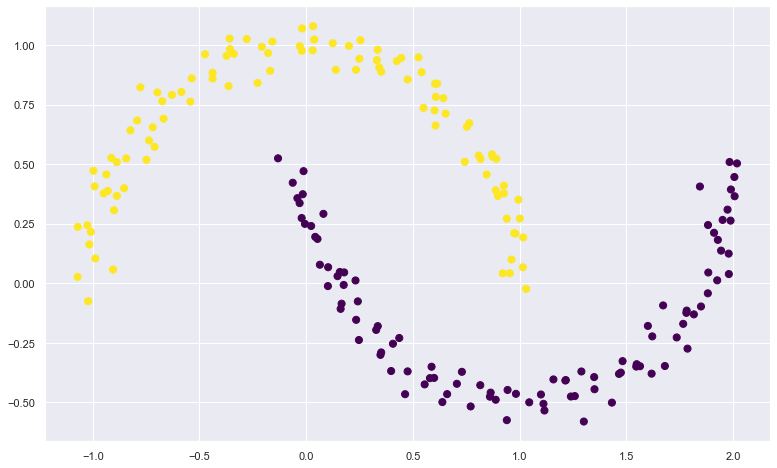

In [107]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

## Example: Digits

That the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [112]:
from sklearn.datasets import load_digits
digits = load_digits()
digits['data'].shape

(1797, 64)

In [113]:
kmeans = KMeans(n_clusters = 10, random_state = 0)

In [114]:
clusters = kmeans.fit_predict(digits.data)

In [115]:
kmeans.cluster_centers_.shape

(10, 64)

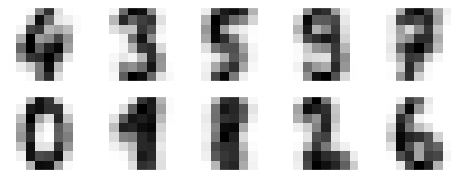

In [116]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

In [117]:
from scipy.stats import mode

labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    print(mode(digits['target'][mask]))
    labels[mask] = mode(digits.target[mask])[0]

ModeResult(mode=array([4]), count=array([163]))
ModeResult(mode=array([3]), count=array([154]))
ModeResult(mode=array([5]), count=array([136]))
ModeResult(mode=array([9]), count=array([139]))
ModeResult(mode=array([7]), count=array([177]))
ModeResult(mode=array([0]), count=array([177]))
ModeResult(mode=array([1]), count=array([55]))
ModeResult(mode=array([8]), count=array([100]))
ModeResult(mode=array([2]), count=array([148]))
ModeResult(mode=array([6]), count=array([177]))


In [118]:
labels

array([0, 8, 8, ..., 8, 9, 9])

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [119]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(digits['target'], labels)

0.7935447968836951

## seismic data analysis

The dataset used in this paper is the 1965-2016 world-wide seismic dataset provided by kaggle.com. This dataset
contains 23,413 records, and each of record includes 21 attributes. Many of these attributes are not related to the
content of this paper, such as "Type", "Location Source" and so on.

In [124]:
data = pd.read_csv('database.csv')

In [125]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [126]:
data = data[['Longitude', 'Latitude']]

In [127]:
data.head()

,Longitude,Latitude
0,145.616,19.246
1,127.352,1.863
2,-173.972,-20.579
3,-23.557,-59.076
4,126.427,11.938


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  23412 non-null  float64
 1   Latitude   23412 non-null  float64
dtypes: float64(2)
memory usage: 365.9 KB


In [129]:
X = data.values

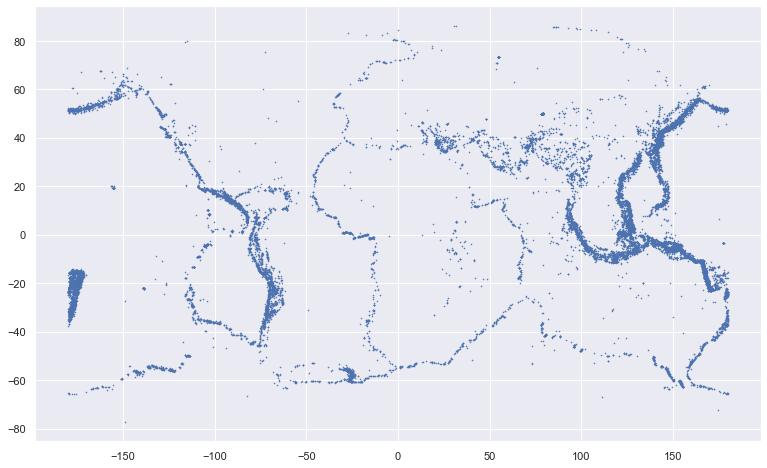

In [130]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], s = 0.3);

- Seismic Belt: In geography, seismic belts around the world are divided into three major seismic zones, namely, the Circum-Pacific Seismic Belt, the Alpine-Himalayan Seismic Belt and the Ridge Seismic Belt. 


<img src = https://qph.fs.quoracdn.net/main-qimg-698ec7fe3ff7f90a5c60dfb47e9668cd>

In [131]:
kmeans = KMeans(n_clusters = 3, random_state = 0)

In [132]:
clusters = kmeans.fit_predict(X)

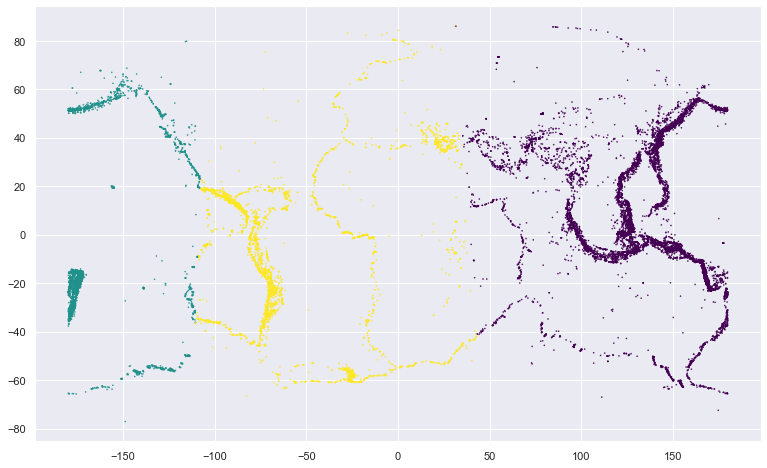

In [133]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], c = clusters, s = 0.3, cmap = 'viridis');

In [148]:
import warnings
warnings.simplefilter("ignore")

In [149]:
my_kmeans = ClusterKMeans(3, metric = 'cosine')

In [150]:
my_kmeans.fit(X)

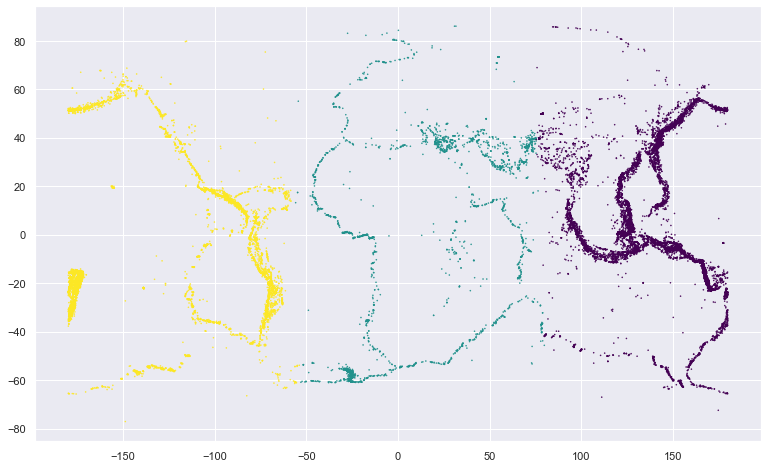

In [151]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], c = my_kmeans.labels, s = 0.3, cmap = 'viridis');

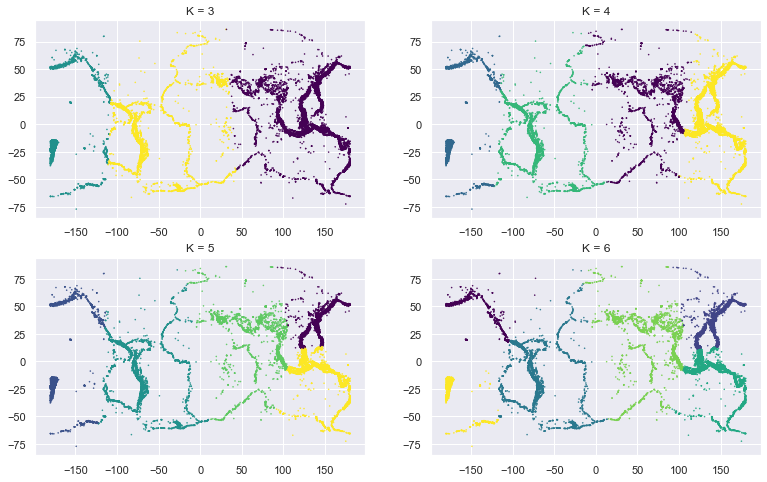

In [152]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))

for i, axi in enumerate(ax.flat):
    
    kmeans = KMeans(n_clusters = 3 + i, random_state = 0)
    clusters = kmeans.fit_predict(X)
    axi.scatter(X[:, 0], X[:, 1], c = clusters, s = 0.3, cmap = 'viridis')
    axi.set_title('K = {}'.format(3 + i));

## k-means for color compression

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.


In [154]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

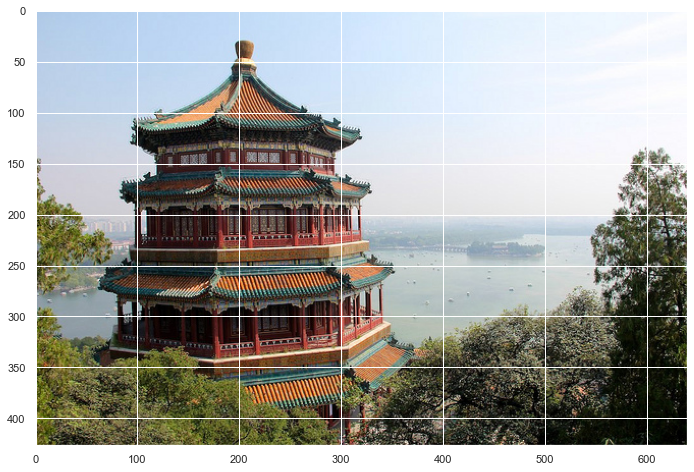

In [155]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.imshow(china);

The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:

In [156]:
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will rescale the colors so that they lie between 0 and 1:

In [157]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [158]:
def plot_pixels(data, title, colors=None, N = 10_000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0, 1))

    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))

    fig.suptitle(title, size = 20);

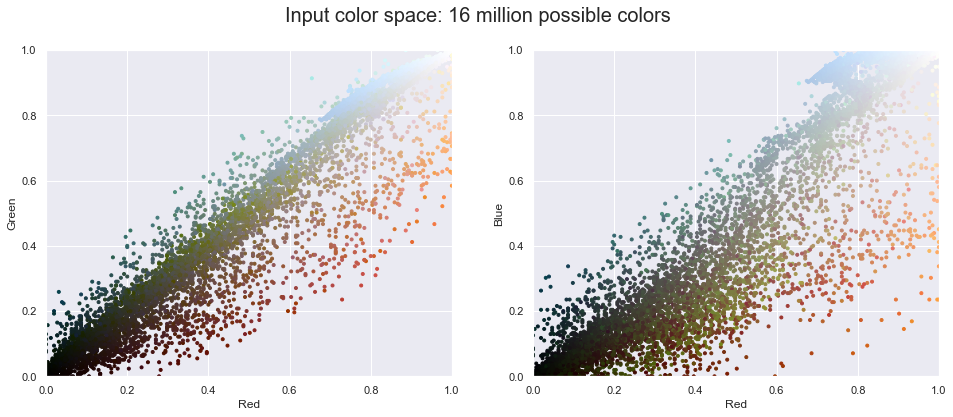

In [159]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [160]:
N = 10_000
rng = np.random.RandomState(0)
i = rng.permutation(data.shape[0])[:N]
colors = data[i]
R, G, B = data[i].T

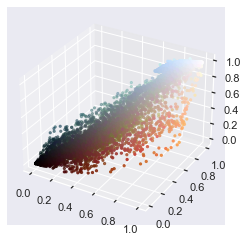

In [161]:
fig = plt.figure(figsize = (15, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(R, G, B, color = colors, marker = '.');

In [162]:
kmeans = KMeans(n_clusters = 16)
kmeans.fit(data)

KMeans(n_clusters=16)

In [169]:
kmeans.cluster_centers_[kmeans.predict(data)].shape

(273280, 3)

In [ ]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

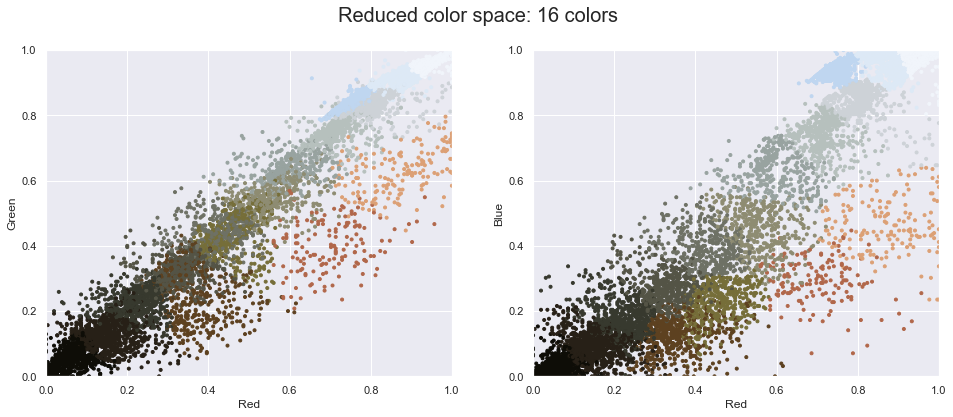

In [170]:
plot_pixels(data, colors = new_colors, title = "Reduced color space: 16 colors")